In [9]:
import pandas as pd
df = pd.read_csv("product_sales.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [10]:
df['sales_method'] = df['sales_method'].str.strip().str.lower()

df['sales_method'] = df['sales_method'].replace({
    'em + call': 'email and call',
    'email + call': 'email and call',
    'email & call': 'email and call'})

In [11]:
df['sales_method'] = df['sales_method'].str.title()

In [12]:
effort_map = {
    'Email': 0.083,
    'Call': 0.5,
    'Email And Call': 0.25}

In [13]:
df['estimated_effort'] = df['sales_method'].map(effort_map)

In [14]:
df['revenue_per_hour'] = df['revenue'] / df['estimated_effort']

In [15]:
summary = df.groupby('sales_method').agg(
    avg_revenue=('revenue', 'mean'),
    avg_effort=('estimated_effort', 'mean'),
    revenue_per_hour=('revenue_per_hour', 'mean'),
    customer_count=('customer_id', 'nunique')
).reset_index()

summary['total_revenue'] = df.groupby('sales_method')['revenue'].sum().values
summary['total_hours'] = df.groupby('sales_method')['estimated_effort'].sum().values
summary['overall_revenue_per_hour'] = summary['total_revenue'] / summary['total_hours']

print(summary)

     sales_method  avg_revenue  avg_effort  revenue_per_hour  customer_count  \
0            Call    47.597467       0.500         95.194934            4962   
1           Email    97.127684       0.083       1170.213063            7466   
2  Email And Call   183.651233       0.250        734.604930            2572   

   total_revenue  total_hours  overall_revenue_per_hour  
0      227563.49     2481.000                 91.722487  
1      672317.83      619.678               1084.947069  
2      408256.69      643.000                634.924868  


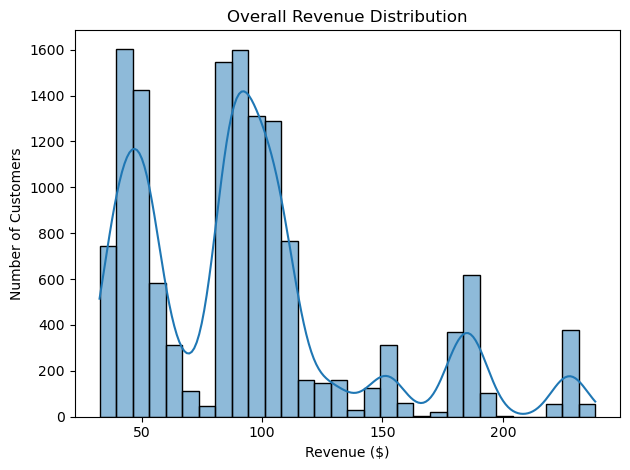

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['revenue'], bins=30, kde=True)
plt.title("Overall Revenue Distribution")
plt.xlabel("Revenue ($)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

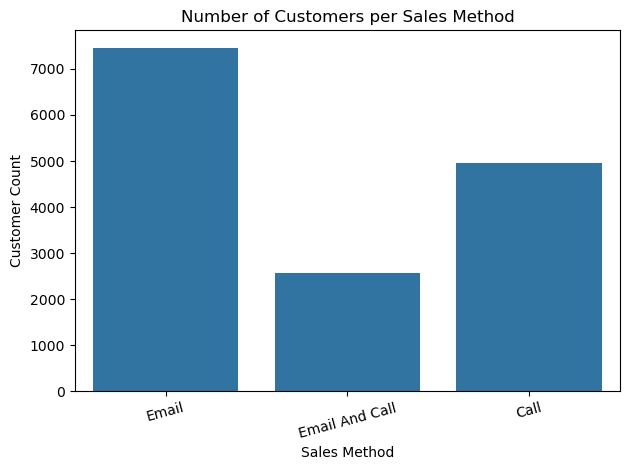

In [18]:
sns.countplot(x='sales_method', data=df)
plt.title("Number of Customers per Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Customer Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

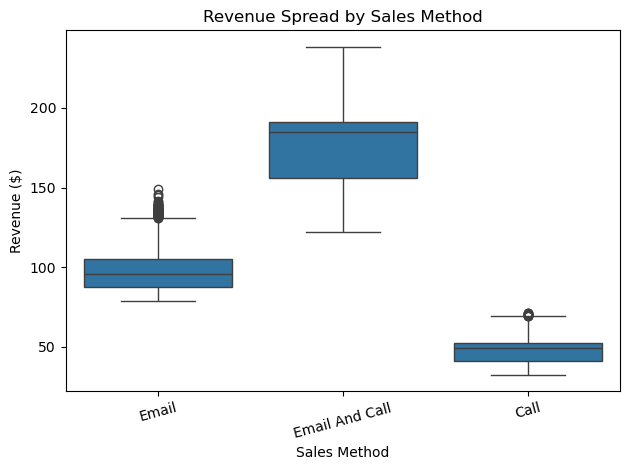

In [19]:
sns.boxplot(x='sales_method', y='revenue', data=df)
plt.title("Revenue Spread by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

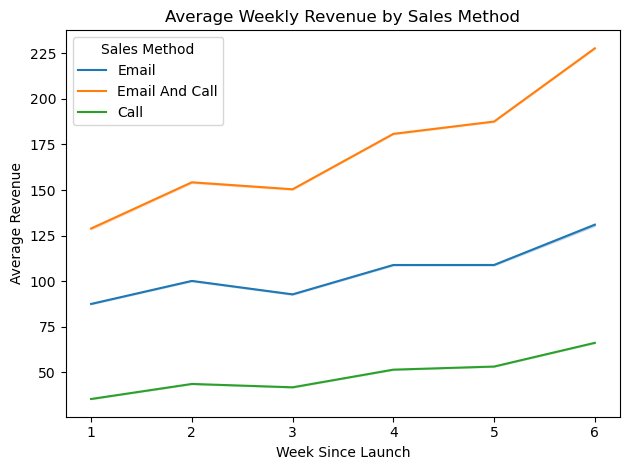

In [20]:
sns.lineplot(data=df, x='week', y='revenue', hue='sales_method', estimator='mean')
plt.title("Average Weekly Revenue by Sales Method")
plt.xlabel("Week Since Launch")
plt.ylabel("Average Revenue")
plt.legend(title='Sales Method')
plt.tight_layout()
plt.show()

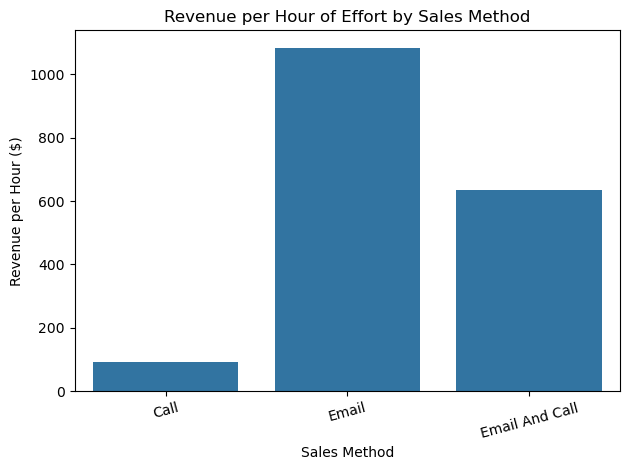

In [21]:
sns.barplot(data=summary, x='sales_method', y='overall_revenue_per_hour')
plt.title("Revenue per Hour of Effort by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue per Hour ($)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

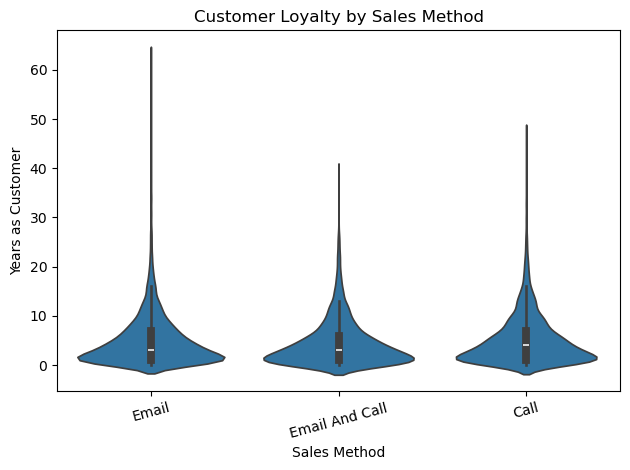

In [22]:
sns.violinplot(x='sales_method', y='years_as_customer', data=df)
plt.title("Customer Loyalty by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Years as Customer")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
